# PyTorch Tutorial 13 - Feed-Forward Neural Network

https://www.youtube.com/watch?v=oPhxf2fXHkQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=13

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## device config

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## hyper parameters

In [3]:
input_size = 784  # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

## MNIST

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(), 
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=False, 
                                           transform=transforms.ToTensor(), 
                                           download=True)

## DataLoader

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)  
                                                              # 'shuffle=False', because it does not matter for the evaluation

#### demonstration

In [6]:
examples = iter(train_loader)
samples, labels = next(examples)

In [7]:
samples.shape

torch.Size([100, 1, 28, 28])

100 elements, 1 color channel, 28 * 28 pixels

In [8]:
labels.shape

torch.Size([100])

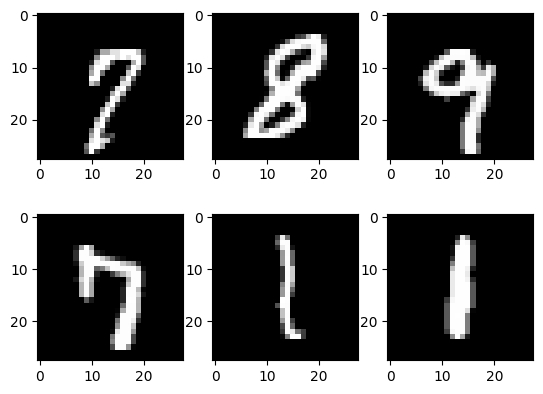

In [9]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

## Multilayer Neural Net, activation function

In [10]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [11]:
model = NeuralNet(input_size, hidden_size, num_classes)

## setting loss and optimizer

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## training loop

In [13]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28 --> 100, 784
        images = images.reshape(-1, 28*28).to(device)  # -1 signifies that the size shall be established automatically
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        loss.backward()
        
        # update step
        optimizer.step()
        optimizer.zero_grad()  # this line can be put before loss.backward() with the same final result... mystery
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.4f}')

epoch 1 / 2, step 100 / 600, loss = 0.5172
epoch 1 / 2, step 200 / 600, loss = 0.3665
epoch 1 / 2, step 300 / 600, loss = 0.3262
epoch 1 / 2, step 400 / 600, loss = 0.1877
epoch 1 / 2, step 500 / 600, loss = 0.2155
epoch 1 / 2, step 600 / 600, loss = 0.1909
epoch 2 / 2, step 100 / 600, loss = 0.2587
epoch 2 / 2, step 200 / 600, loss = 0.0941
epoch 2 / 2, step 300 / 600, loss = 0.1856
epoch 2 / 2, step 400 / 600, loss = 0.2878
epoch 2 / 2, step 500 / 600, loss = 0.2741
epoch 2 / 2, step 600 / 600, loss = 0.2622


## test

In [14]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    accuracy = 100. * n_correct / n_samples
    print(f'accuracy = {accuracy}')

accuracy = 95.49
